# TDoA (Time Difference of Arrival) localization

In [4]:
import pathlib
import numpy as np
import pandas as pd
import scipy
import scipy.io
import matplotlib
import matplotlib.pyplot as plt

## Visualizing all the recievers on a plot

In [5]:
measurement_path = pathlib.Path('dataset/T20230222_1337_PoC_RDs_DMRS_UDP_Serial_Array_332_346_353_354_364_419_120.mat')
recievers = pd.read_csv(pathlib.Path('dataset/dot_coordinates.csv'), index_col='id_short')

In [6]:
recievers

,id_long,label,x,y,z
id_short,,,,,
120,TD3W211120,DOT20,25.082908,-9.11154,4.796871
126,TD3W211126,DOT21,42.465674,-17.51020,3.592475
131,TD3W211131,DOT22,39.125749,-37.54210,3.495790
133,TD3W211133,DOT23,32.514523,-29.61950,3.519441
153,TD3W211153,DOT24,10.790700,-42.59800,2.628408
323,TD3W201323,DOT01,43.170114,-8.38082,3.513311
332,TD3W201332,DOT02,24.468584,-21.65040,4.785801
338,TD3W201338,DOT04,32.171942,-21.73400,2.605779
346,TD3W201346,DOT05,8.460898,-18.29430,4.241591


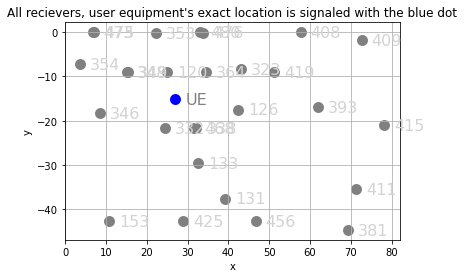

In [27]:
cmap = matplotlib.colormaps['Spectral']
fig, ax = plt.subplots()

recievers.plot('x', 'y', kind='scatter', ax=ax, s=120, linewidth=0, 
        c= 'gray')


ue_data = pd.read_csv('dataset/configuration.csv')

ue_data.plot('x', 'y', kind='scatter', ax=ax, s=120, linewidth=0, 
        c='blue')


for k, v in ue_data.iterrows():
    ax.annotate("UE", v[['x', 'y']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=16, color='grey')

for k, v in recievers.iterrows():
    ax.annotate(k, v[['x', 'y']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=16, color='lightgrey')
    
plt.title("All recievers, user equipment's exact location is signaled with the blue dot")

ax.grid(True)

## Visualizing the active recievers on a plot

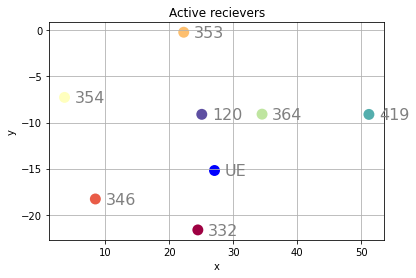

In [26]:
cmap = matplotlib.colormaps['Spectral']
fig, ax = plt.subplots()

ue_data.plot('x', 'y', kind='scatter', ax=ax, s=120, linewidth=0, 
        c='blue', colormap=cmap)

active_dots = [int(x) for x in measurement_path.stem.split('_')[-7:]]
df = recievers.loc[active_dots]
df.plot('x', 'y', kind='scatter', ax=ax, s=120, linewidth=0, 
        c=range(len(df)), colormap=cmap)

for k, v in ue_data.iterrows():
    ax.annotate("UE", v[['x', 'y']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=16, color='grey')

for k, v in df.iterrows():
    ax.annotate(k, v[['x', 'y']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=16, color='grey')
    
plt.title("Active recievers")
    
ax.grid(True)